### This code was prepared by **Delta Modeling Section** based on Tetra Tech's report to simulate ion constituents in the Delta.
### Tetra Tech report uploaded in Resource folder
### Dataset: total dissolved solids (TDS), bromide (Br-), chloride (Cl-), sulfate (SO42-), Alkalinity, sodium (Na+), calcium (Ca2+), magnesium (Mg2+), and potassium (K+)

## Study area: Interior Delta with three subregions: 
###     1. Old-Middle River Export Corridor 
###     2. San Joaquin River Corridor 
###     3. South Delta 

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import sem

# 2. Importing the dataset

In [22]:
Alk_path="inputs/Alkalinity.csv"
Br_path="inputs/Br.csv"
Ca_path="inputs/Ca.csv"
Cl_path="inputs/Cl.csv"
K_path="inputs/K.csv"
Mg_path="inputs/Mg.csv"
Na_path="inputs/Na.csv"
SO4_path="inputs/SO4.csv"
TDS_path="inputs/TDS.csv"
Sea_low="inputs/Sea_low.csv"
Sea_high="inputs/Sea_high.csv"
SJ="inputs/SJ.csv"
IND="inputs/IND.csv"

Alkalinity= pd.read_csv(Alk_path)
Br= pd.read_csv(Br_path)
Ca= pd.read_csv(Ca_path)
Cl= pd.read_csv(Cl_path)
K= pd.read_csv(K_path)
Mg= pd.read_csv(Mg_path)
Na= pd.read_csv(Na_path)
SO4= pd.read_csv(SO4_path)
TDS= pd.read_csv(TDS_path)
Sea_l=pd.read_csv(Sea_low)
Sea_h=pd.read_csv(Sea_high)
SJ=pd.read_csv(SJ)
IND=pd.read_csv(IND)

Alkalinity= pd.DataFrame(Alkalinity)
Br= pd.DataFrame(Br)
Ca= pd.DataFrame(Ca)
Cl= pd.DataFrame(Cl)
K = pd.DataFrame(K)
Mg= pd.DataFrame(Mg)
Na= pd.DataFrame(Na)
SO4= pd.DataFrame(SO4)
TDS= pd.DataFrame(TDS)
Sea_l=pd.DataFrame(Sea_l)
Sea_h=pd.DataFrame(Sea_h)
SJ=pd.DataFrame(SJ)
IND=pd.DataFrame(IND)


# 3. Data preprocessing (Preparing separate datasets for three subregions)

In [23]:
dataset2=Alkalinity['Collection Date'].str.split("/",n=2, expand=True)
dataset2 = pd.DataFrame(dataset2)
Alkalinity['year'] = dataset2[2].astype('int')
Alkalinity['Month'] = dataset2[0].astype('int')

dataset3=Br['Collection Date'].str.split("/",n=2, expand=True)
dataset3 = pd.DataFrame(dataset3)
Br['year'] = dataset3[2].astype('int')
Br['Month'] = dataset3[0].astype('int')

dataset4=Ca['Collection Date'].str.split("/",n=2, expand=True)
dataset4 = pd.DataFrame(dataset4)
Ca['year'] = dataset4[2].astype('int')
Ca['Month'] = dataset4[0].astype('int')

dataset5=Cl['Collection Date'].str.split("/",n=2, expand=True)
dataset5 = pd.DataFrame(dataset5)
Cl['year'] = dataset5[2].astype('int')
Cl['Month'] = dataset5[0].astype('int')

dataset6=Ca['Collection Date'].str.split("/",n=2, expand=True)
dataset6 = pd.DataFrame(dataset6)
Ca['year'] = dataset6[2].astype('int')
Ca['Month'] = dataset6[0].astype('int')

dataset7=K['Collection Date'].str.split("/",n=2, expand=True)
dataset7 = pd.DataFrame(dataset7)
K['year'] = dataset7[2].astype('int')
K['Month'] = dataset7[0].astype('int')

dataset8=Mg['Collection Date'].str.split("/",n=2, expand=True)
dataset8 = pd.DataFrame(dataset8)
Mg['year'] = dataset8[2].astype('int')
Mg['Month'] = dataset8[0].astype('int')

dataset9=Na['Collection Date'].str.split("/",n=2, expand=True)
dataset9 = pd.DataFrame(dataset9)
Na['year'] = dataset9[2].astype('int')
Na['Month'] = dataset9[0].astype('int')

dataset10=SO4['Collection Date'].str.split("/",n=2, expand=True)
dataset10 = pd.DataFrame(dataset10)
SO4['year'] = dataset10[2].astype('int')
SO4['Month'] = dataset10[0].astype('int')

dataset11=TDS['Collection Date'].str.split("/",n=2, expand=True)
dataset11 = pd.DataFrame(dataset11)
TDS['year'] = dataset11[2].astype('int')
TDS['Month'] = dataset11[0].astype('int')

In [37]:
def ion_simulator_TT(ion, N):
    ions={'TDS':0, "Mg":1, "Na":2, "Ca":3, "Cl":4, "SO4":5, "Br":6, "Alkalinity":7, "K":8}
    ionsK=list(ions.keys())
    ionC=ionsK[N]
    cf=ions[ionC]
    df= ion
    df['simulated'] = np.nan
    df.loc[(df['Location']=="SouthDelta") & (df['WYT'] == 'BN') & ((df['Month']<3) | (df['Month']>7)), 'simulated'] = IND['a'][cf]*(df['EC'])*(df['EC'])+ IND['b'][cf]*(df['EC'])+IND['c'][cf]
    df.loc[(df['Location']=="SouthDelta") &(df['WYT'] == 'D') & ((df['Month']<3) | (df['Month']>7)), 'simulated'] =IND['a'][cf]*(df['EC'])*(df['EC'])+ IND['b'][cf]*(df['EC'])+IND['c'][cf]
    df.loc[(df['Location']=="SouthDelta") &(df['WYT'] == 'C') & ((df['Month']<3) | (df['Month']>5)), 'simulated'] = IND['a'][cf]*(df['EC'])*(df['EC'])+ IND['b'][cf]*(df['EC'])+IND['c'][cf]
    df.loc[(df["Sacramento X2"]<81) & (df['Location']=="SouthDelta") & (df['WYT'] == 'AN') & ((df['Month']<2) | (df['Month']>11)), 'simulated'] = IND['a'][cf]*(df['EC'])*(df['EC'])+ IND['b'][cf]*(df['EC'])+IND['c'][cf]
    df.loc[(df['Location']=="SouthDelta") &(df['simulated'].isnull()), 'simulated'] =SJ['a'][cf]*(df['EC'])*(df['EC'])+ SJ['b'][cf]*(df['EC'])+ SJ['c'][cf]

    df.loc[(df['Location']=="SJRcorridor") , 'simulated'] = SJ['a'][cf]*(df['EC'])*(df['EC'])+ SJ['b'][cf]*(df['EC'])+ SJ['c'][cf]

    df.loc[(df['Location']=="OMR") & (df['WYT'] == 'W') & ((df['Month']<9) | (df['Month']>1)), 'simulated'] = SJ['a'][cf]*(df['EC'])*(df['EC'])+ SJ['b'][cf]*(df['EC'])+ SJ['c'][cf]
    df.loc[(df['Location']=="OMR") & (df['WYT'] == 'AN') & ((df['Month']<9) | (df['Month']>1)), 'simulated'] = SJ['a'][cf]*(df['EC'])*(df['EC'])+ SJ['b'][cf]*(df['EC'])+ SJ['c'][cf]
    df.loc[(df['Location']=="OMR") &(df['simulated'].isnull()) & (df['EC']<250), 'simulated'] = Sea_l['K1'][cf] + Sea_l['K2'][cf]*pow((df['EC']), 0.5) + Sea_l['K3'][cf]*(df['EC']) + Sea_l['K4'][cf]*pow((df['EC']), 1.5) + Sea_l['K5'][cf]*pow((df['EC']), 2)+ Sea_l['K6'][cf]*pow((df['EC']), 2.5)
    df.loc[(df['Location']=="OMR") &(df['simulated'].isnull()) & (df['EC']>250), 'simulated'] = Sea_h['K1'][cf] + Sea_h['K2'][cf]*pow((df['EC']), 0.5) + Sea_h['K3'][cf]*(df['EC']) + Sea_h['K4'][cf]*pow((df['EC']), 1.5) + Sea_h['K5'][cf]*pow((df['EC']), 2)+ Sea_h['K6'][cf]*pow((df['EC']), 2.5)

    df.loc[(df["Sacramento X2"]<81) & ((df['Month']>2) | (df['Month']<12)), 'simulated'] =SJ['a'][cf]*(df['EC'])*(df['EC'])+ SJ['b'][cf]*(df['EC'])+ SJ['c'][cf]

    print("df:        ","R2 =",round(r2_score(df[ionC],df['simulated']),ndigits=2),"   MAE =", round(mean_absolute_error(df['simulated'],df[ionC]),ndigits=2), "  MSE =", round(mean_squared_error(df['simulated'],df[ionC]),ndigits=2))
    df['error']=  df['simulated']-df[ionC]
    Max1 = df[ionC].max()
    Max2= df['simulated'].max()
    Max= max(Max1,Max2)
    fig, ax = plt.subplots(figsize=(5,5),dpi=100)
    ax.scatter(df[ionC], df['simulated'], color='red',s=2.5)
    ax.plot((0, Max), (0, Max), 'b--', label="Perfect model line (1:1)", color='black')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Simulated')
    #ax.set_title('Ion: '+ionC + '   TT method')
    ax.legend(loc=0)
    ionC = df
    #df.to_csv('ion.csv')
    return df


df:         R2 = 0.79    MAE = 9.52   MSE = 163.4


c:\Users\peymanhn\Anaconda3\envs\ion_ml\lib\site-packages\ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.


,Long Station Name,Collection Date,EC,Alkalinity,Sacramento X2,Location,Area,WYT,Data,year,Month,simulated,error
0,Old River near Rock Slough,6/19/1959,318.0,76.0,91.438186,OMR,Interior,BN,TT,1959,6,67.014635,-8.985365
1,Old River near Rock Slough,6/19/1959,327.0,73.0,91.438186,OMR,Interior,BN,TT,1959,6,67.021201,-5.978799
2,Old River near Rock Slough,7/7/1959,716.0,74.0,94.298896,OMR,Interior,BN,TT,1959,7,67.312327,-6.687673
3,Old River near Rock Slough,7/7/1959,749.0,73.0,94.298896,OMR,Interior,BN,TT,1959,7,67.337529,-5.662471
4,Old River near Rock Slough,7/21/1959,1320.0,69.0,95.924951,OMR,Interior,BN,TT,1959,7,67.782120,-1.217880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,PDUP,4/29/2020,908.0,110.0,75.000000,SouthDelta,Interior,D,NCRO,2020,4,123.534994,13.534994
1035,TWA,4/29/2020,676.0,98.0,75.000000,SouthDelta,Interior,D,NCRO,2020,4,100.687262,2.687262
1036,PDUP,5/18/2020,1540.0,166.0,81.000000,SouthDelta,Interior,D,NCRO,2020,5,163.878840,-2.121160
1037,ORX,6/16/2020,254.0,50.0,80.000000,SouthDelta,Interior,D,NCRO,2020,6,48.060908,-1.939092


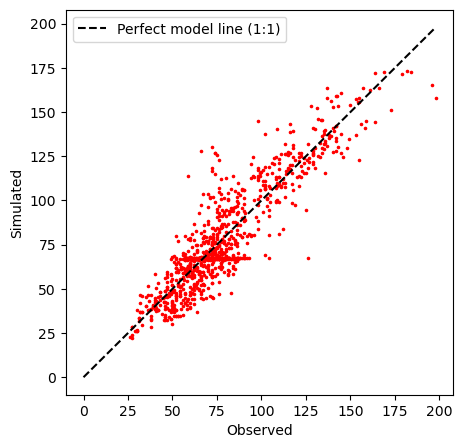

In [41]:
#Please use "ion_simulator_TT" function and choose ion and the a number listed blow. 
# ion_calculator(ion, N)
# TDS:0, Mg:1, Na:2, Ca:3, Cl:4, SO4:5, Br:6, Alkalinity:7, K:8
ion=K
ion_simulator_TT(Alkalinity, 7)

In [10]:
df

NameError: name 'df' is not defined

<AxesSubplot:xlabel='Data', ylabel='error'>

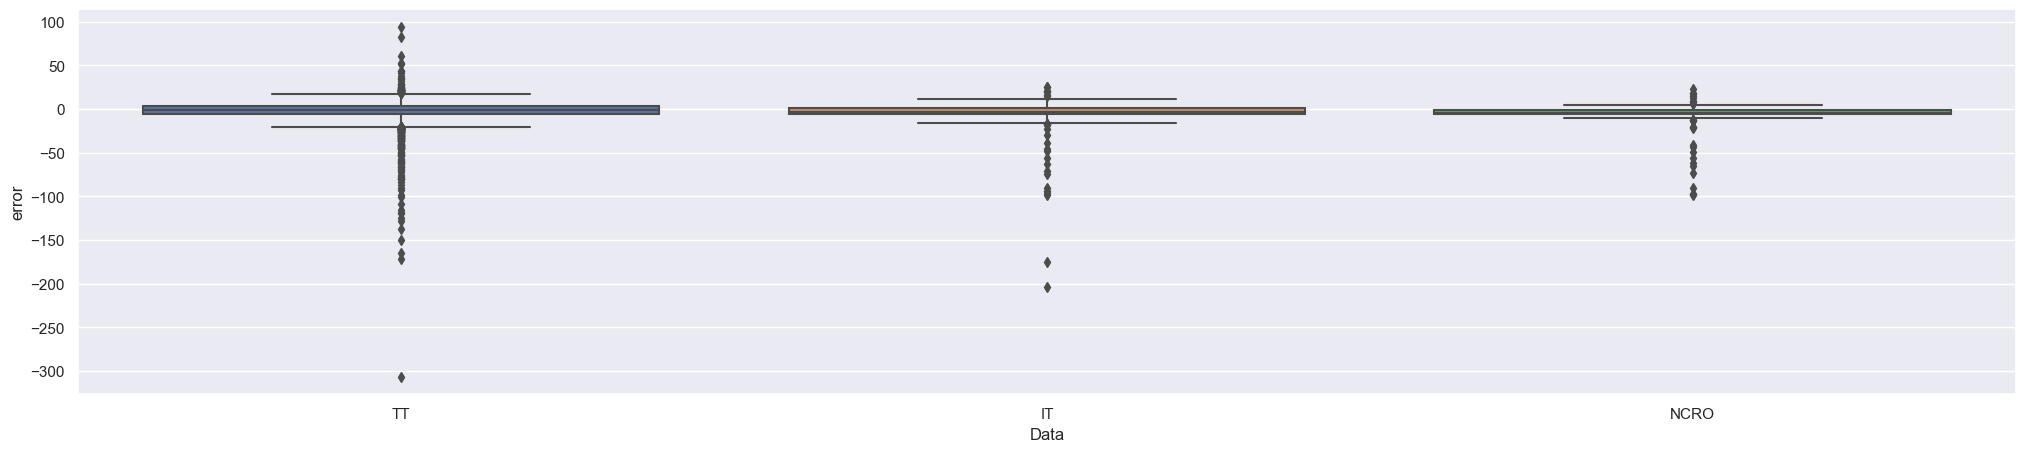

In [163]:
sns.boxplot(x="Data", y="error",data=ion)

<AxesSubplot:xlabel='Month', ylabel='error'>

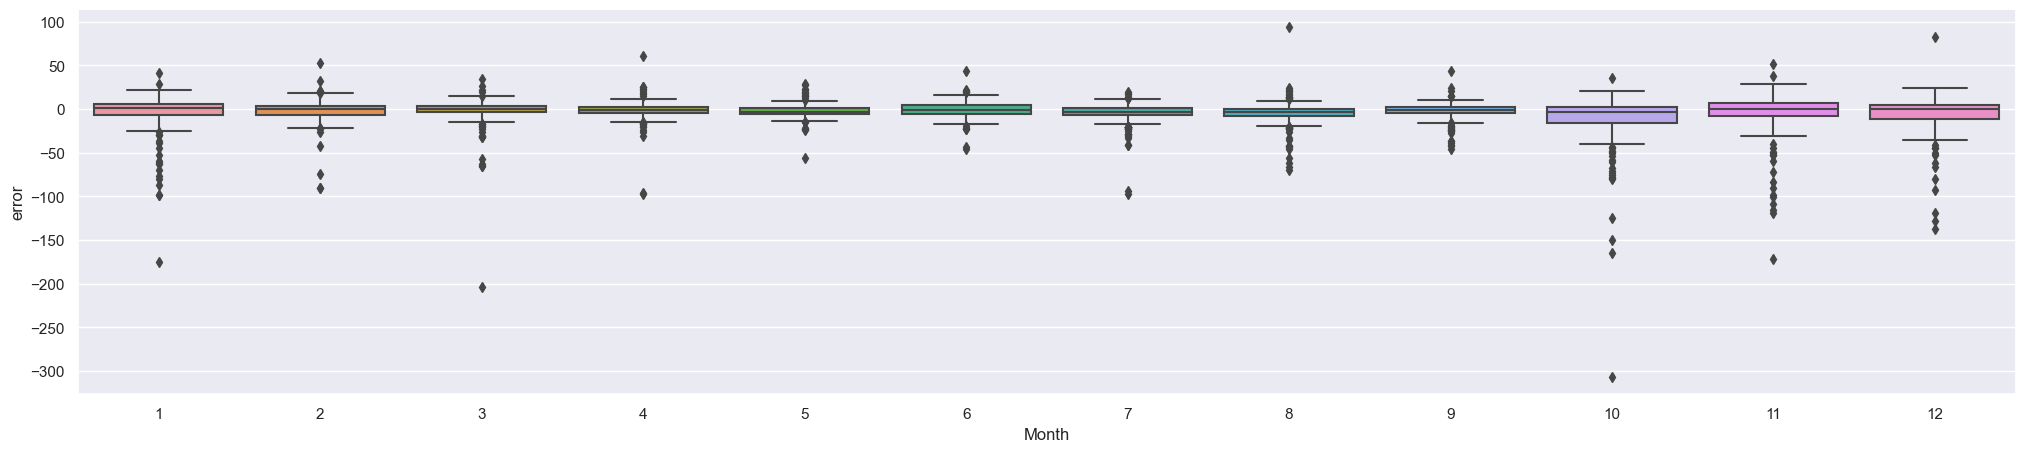

In [164]:
sns.boxplot(x="Month", y="error",data=ion)

<AxesSubplot:xlabel='year', ylabel='error'>

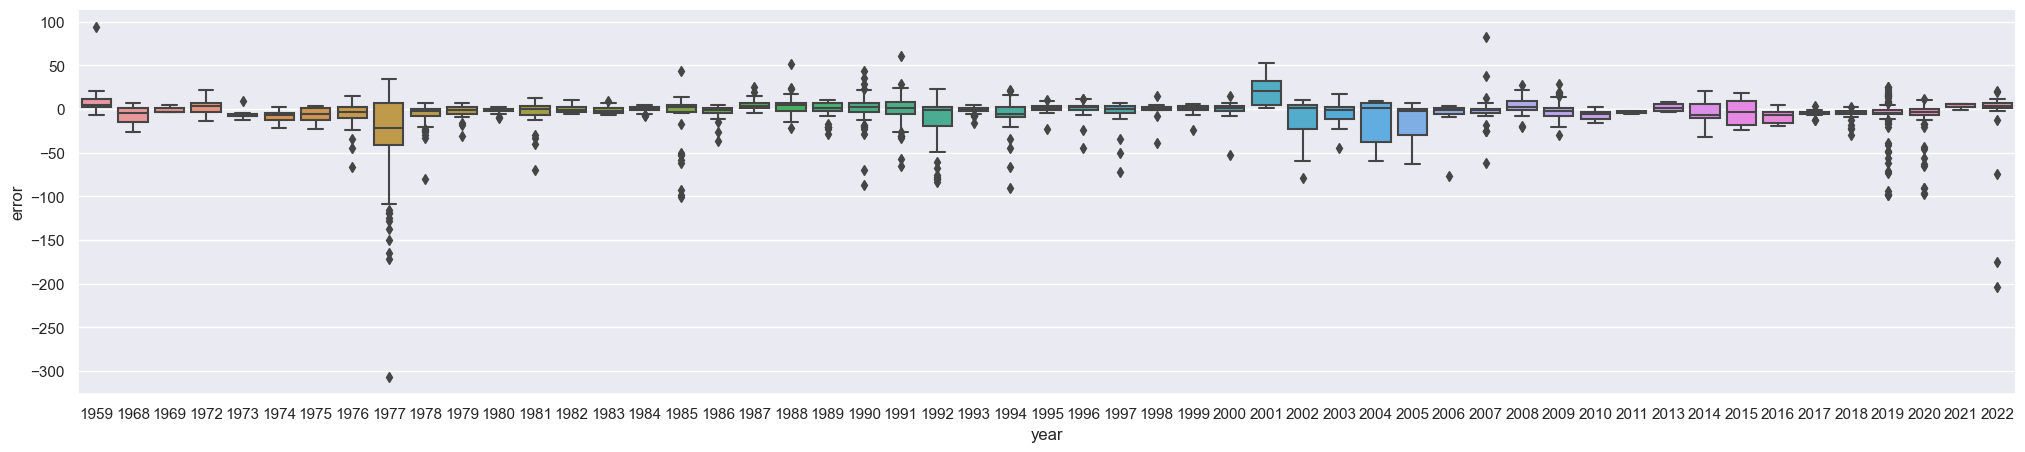

In [165]:
sns.set(rc={'figure.figsize':(25,5)})
sns.boxplot(x="year", y="error",data=ion)

In [166]:
ion

,Long Station Name,Collection Date,EC,Cl,Sacramento X2,Location,Area,WYT,Data,year,Month,simulated,error
0,Old River near Rock Slough,6/19/1959,327.0,44.00,91.438186,OMR,Interior,BN,TT,1959,6,46.275705,2.275705
1,Old River near Rock Slough,6/19/1959,318.0,34.00,91.438186,OMR,Interior,BN,TT,1959,6,43.812081,9.812081
2,Old River near Rock Slough,7/7/1959,749.0,160.00,94.298896,OMR,Interior,BN,TT,1959,7,164.965598,4.965598
3,Old River near Rock Slough,7/7/1959,716.0,152.00,94.298896,OMR,Interior,BN,TT,1959,7,155.508905,3.508905
4,Old River near Rock Slough,7/21/1959,1740.0,451.00,95.924951,OMR,Interior,BN,TT,1959,7,457.531389,6.531389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,Middle River @ Union Point - P10A,4/5/2022,400.6,46.00,81.000000,OMR,Interior,C,IT,2022,4,66.556856,20.556856
1968,C10A - San Joaquin River near Vernalis @ SJR Club,4/5/2022,622.0,72.40,81.000000,SJRcorridor,Interior,C,IT,2022,4,81.448746,9.048746
1969,Old River near Doughty Cut - ORX,4/7/2022,679.0,81.00,80.000000,SouthDelta,Interior,C,IT,2022,4,90.309766,9.309766
1970,Old River below Headwaters,4/7/2022,679.0,82.65,80.000000,SJRcorridor,Interior,C,IT,2022,4,90.309766,7.659766
